<a class="anchor" id="0.1"></a>
# **Table of Contents** 

[1. Background](#1) 

[2. Lake_Bilancino](#2) 

[3. Data Analysis](#3) 

[4. Missing Data Analysis](#4)

* [4.1 Heat Map for Missing Data](#4.1)

* [4.2 Handling Missing Data](#4.2)

[5. Correlation Analysis](#5)

* [5.1 Correlation Analysis among two targets](#5.1)

[6. Date Index and Chronology Check](#6)

* [6.1 Setting Date as Index](#6.1)

* [6.2 Chronology Check](#6.2)

[7. Visualization of Features and Targets](#7)

[8. Resampling](#8)

[9. Statistical Analysis](#9)

[10. Plotting Time Series](#10)

* [10.1 ETS Decomposition](#10.1)

* [10.2.  Simple Moving Average and Exponential Weighted Moving Average](#10.2)

[11. Augmented Dickey-Fuller](#11)

[12. AutoCorrelation](#11)

* [12.1 Autocorrelation Function (ACF)](#12.1)

* [12.2 Partial Autocorrelation Function (PACF)](#12.2)

* [12.3 Autocorrelation, ACF and PACF plots](#12.3)

[13.Training and Test Data Creation](#13)

[14. Model Creation](#14)

[15. ARIMA](#15)

* [15.1 Lake_Level - ARIMA(1,1,0)](#15.1)

* [15.2 Flow_Rate - ARIMA(1,1,1)](#15.2)

[16. XGBRegressor](#16)

* [16.1 Lake_Level](#16.1)

* [16.2 Flow_Rate](#16.2)

[17. Forecast using XGBRegressor](#17)

* [17.1 Lake_Level](#17.1)

* [17.2 Flow_Rate](#17.2)

[18. Reference](#18)

<a id="1"></a> <br>
# 1. Background

[Go to Top](#0.1)

A water supply company struggles with the need to forecast the water level in a waterbody (water spring, lake, river, or aquifer) to handle daily consumption. During fall and winter water bodies are refilled, but during spring and summer they start to drain. To help preserve the health of these water bodies, it is important to predict the most efficient water availability, in terms of level and water flow for each day of the year.

Acea group is one the leading Italian multiutility operators, listed on Italian Stock Exchange since 1999. The company manages and develops water and electricity networks and environmental services. Acea is the foremost Italian operator in the water services sector supplying 9 million inhabitants in various regions

The Acea Group provides data for 4 types of water bodies, namely, 

* Water Spring

* Lake

* River

* Aquifer

While the primary intention is the same i.e., to predict water availability, the reality is that each waterbody has such unique characteristics that their attributes are not linked to each other.


<a id="2"></a> <br>
# 2. Lake Bilancino

[Go to Top](#0.1)

Lake is a large inland body of fresh water or salt water. Bilancino lake is an artificial lake located in the municipality of Barberino di Mugello (about 50 km from Florence). It is used to refill the Arno river during the summer months. Indeed, during the winter months, the lake is filled up and then, during the summer months, the water of the lake is poured into the Arno river.

This competition have 9 dataset and below are the output or target to be predicted. Here I am taking only Lake Bilancino dataset for analysis and it has 2 targets

* lake level 
* flow rate 

to be predicted.

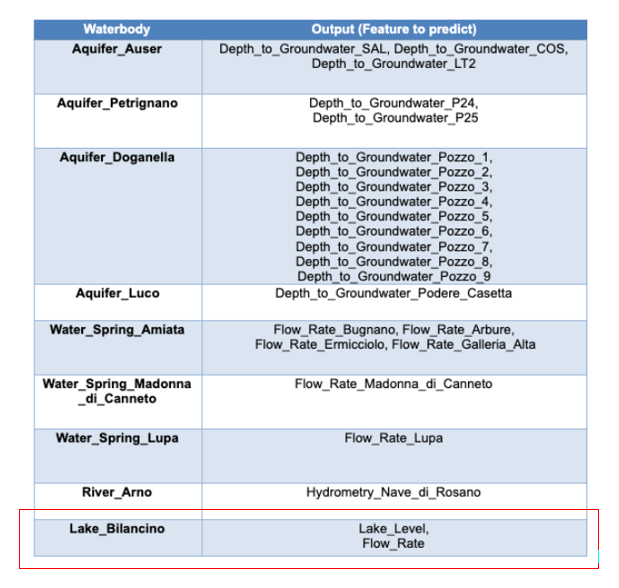

Here we will use ARIMA and XGBRegressor for Analysis of Time series. Forecasting of Timeseries is done using XGBRegressor.

<a id="3"></a> <br>
# 3. Data Analysis

[Go to Top](#0.1)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('../input/acea-water-prediction/Lake_Bilancino.csv')

In [ ]:
df.head()

There are null values in the dataset.

In [ ]:
print("Number of rows is = ", df.shape[0], " \nNumber of columns is = " , df.shape[1]) 

In [ ]:
df.info()

In [ ]:
print('Starting date is :' , df['Date'].iloc[0],
      '\nEnding Date is : ',df["Date"].iloc[-1])

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Initial Analysis says :
    <li>There are missing data in the dataset.</li>
    <li>The data availability is from 03-Jun-2002 to 30-Jun-2020 </li></p> </div>

<a id="4"></a> <br>
# 4. Missing Data Analysis

[Go to Top](#0.1)

In [ ]:
pd.Series(df.isnull().sum()).rename_axis('features/target').to_frame('Missing Value Count')

<a id="4.1"></a> <br>
# 4.1 Heat Map for Missing Data

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="coolwarm")

Here entire dataset of Lake Bilancino is represented by the blue rectangle and each red strips indicates missing value. The value at top is the oldest data and at the bottom is the newest one.

From this visualisation it is clear the missing data is at top that is old data, so we can drop those.

<a id="4.2"></a> <br>
# 4.2 Handling Missing Data

In [ ]:
df = df[df.Temperature_Le_Croci.notna()].reset_index(drop=True)

In [ ]:
df.head().style.background_gradient(cmap='Dark2_r')

In [ ]:
df.isnull().sum().sum()

In [ ]:
print('Starting date After Deletion of old  missing data is :' ,      
      df['Date'].iloc[0],
      '\nEnding Date  After Deletion of old missing data is : ',      
      df['Date'].iloc[-1])

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
After deletion of old data, the data is from 02-Jan-2004 to 30-Jun-2020 .</p> </div>

<a id="5"></a> <br>
# 5. Correlation Analysis

[Go to Top](#0.1)

In [ ]:
plt.figure(figsize=(10, 5))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, annot=True, cmap='Dark2');

Rainfall at different place is highly correlated to themself where as Lake level and flow rate is having less correlation.

In [ ]:
corr1 = df.drop(['Lake_Level'],axis = 1)
correlation = pd.DataFrame(corr1.corr().Flow_Rate).style.background_gradient(cmap='Dark2_r')
correlation

In [ ]:
corr2 = df.drop(['Flow_Rate'],axis = 1)
correlation2 = pd.DataFrame(corr2.corr().Lake_Level).style.background_gradient(cmap='Dark2_r')
correlation2

<a id="5.1"></a> <br>
# 5.1 Correlation Analysis among two targets

In [ ]:
df['Lake_Level'].corr(df['Flow_Rate'])

In [ ]:
df[['Lake_Level','Flow_Rate']].plot(figsize=(10,5))

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Both targets Lake level and Flow rate are having very less correlation.</p> </div>

<a id="6"></a> <br>
# 6. Date Index and Chronology Check

[Go to Top](#0.1)

<a id="6.1"></a> <br>
# 6.1  Setting Date as Index

For timeseries data, Date should be converted to index.

In [ ]:
from datetime import datetime, date 

df['Date'] = pd.to_datetime(df['Date'], format = '%d/%m/%Y')
df['Date'].head(2)

Now the data type of Date is datetime64[ns]

<a id="6.2"></a> <br>
# 6.2 Choronology Check

For Timeseries analysis, the data should be in chronological order that is the timestamps should be equidistant in time series. If the data is not having constant distance between them, the we will have to resample them so that they have constant distance between them.

To check chronological order we can sort the data frame by the timestamps and find difference between consecutive row date.

In [ ]:
df = df.sort_values(by='Date')

# Check time intervals
df['Diff'] = df['Date'] - df['Date'].shift(1)

df[['Date', 'Diff']].head()

In [ ]:
df.shape[0]

In [ ]:
df['Diff'].value_counts()


In [ ]:
df['Diff'].sum()

In [ ]:
df = df.drop('Diff', axis=1)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
The time interval is one day and the data is already in chronological order.</p> </div>

<a id="7"></a> <br>
# 7. Visualization of Features and Targets

[Go to Top](#0.1)

In [ ]:
for i, column in enumerate(df.drop('Date', axis=1).columns):
    sns.lineplot(x=df['Date'], y=df[column])
    My_Title = "Distribution of " + df.columns[i+1]
    plt.title(My_Title)
    plt.show()

<a id="8"></a> <br>
# 8. Resampling

[Go to Top](#0.1)

Resampling is the same as a ‘groupby’ but applied on a DateTime index. It is a Convenience method for frequency conversion and resampling of time series.

There are two types of resampling:

* Upsampling: Increases the frequency of the samples, such as from minutes to seconds. Here care may be needed in determining how the fine-grained observations are calculated using interpolation. 

* Downsampling: Decreases the frequency of the samples, such as from days to months. Here care may be needed in selecting the summary statistics used to calculate the new aggregated values.

The main reason for resampling are:

* Problem Framing: Resampling may be required if your data is not available at the same frequency that you want to make predictions.

* Feature Engineering: Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.

Our dataset is having the same frequency. 
So here we will be using .resample() is for feature engineering.
Also, there is no necessity to look at the daily data. Considering weekly data seems to be sufficient as well. 

In python we can use pandas.DataFrame.resample() function to resample time-series data.

In [ ]:
downsampled = df[['Date', 'Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
                   'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
                   'Lake_Level', 'Flow_Rate']].resample('7D', on='Date').mean().reset_index(drop=False)

df = downsampled

In [ ]:
df.head().style.background_gradient(cmap='Dark2_r')

## Resampled Data Line Plot

In [ ]:
for i, column in enumerate(df.drop('Date', axis=1).columns):
    sns.lineplot(x=df['Date'], y=df[column])
    My_Title = "Resampled / Weekly Distribution of " + df.columns[i+1]
    plt.title(My_Title)
    plt.show()

<a id="9"></a> <br>
# 9.  Statistical Analysis

[Go to Top](#0.1)

For Statistical analysis, the time series has to be stationarity that is observations are not dependent on the time. Statistical properties of these time series will not change with time thus they will have constant mean, variance, and covariance. Details about stationarity you can read from [here](https://medium.com/codex/what-is-stationarity-in-time-series-how-it-can-be-detected-7e5dfa7b5f6b).

To check if a timeseries is Stationary can be done by using:

* Plotting time series and check for trend or seasonality.

* By Splitting time series into the different partitions and compare the statistical inference.

* Augmented Dickey-Fuller test

The time series which have trends or with seasonality, are not stationary where as Cyclic behavior and white noise in time series are stationary. 

Once after doing all the three tests the timeseries is found to be stationary then we will have to convert it into stationary.

The two most common methods to transform series into stationarity are:

* Transformation: Using log or square root to stabilize the non-constant variance.

* Differencing: subtracts the current value from the previous one. Differencing can be done in different orders like first-order differencing(will have linear trend), second-order differencing(will have quadratic trends), etc.


<a id="10"></a> <br>
# 10.  Plotting Time Series

[Go to Top](#0.1)

<a id="10.1"></a> <br>
# 10.1.   ETS Decomposition

Time Series can be decomposed into smaller components that will be easier for us to understand the data in depth. By decomposition, we can analyze each component separately and a deeper understanding of the dataset helps in better forecasting, that is predicting the future with the help of present and past data.

Decomposition of time series can be done with time-series pattern and noise.
Time-series patterns are:

* Trend
* Seasonality
* Cyclic


**Trend:**
A trend is a pattern of time series in a time plot, which shows the movement of data with respect to time. There are 3 types of trends:

* Upward Trend: Here the data pattern movement will be upwards.
* Downward Trend: Here the data pattern movement will be downwards.
* Horizontal/Stationary Trend: Here the data pattern will have no movement or it will be stationary.



**Seasonality:**

When the pattern in time series shows a variation for a regular time interval it is called seasonality. Seasonality can be yearly, monthly, weekly, daily, or a specific time of day. Seasonal patterns are always fixed or have a known length.


**Cyclic:**

The cyclical component refers to fluctuations around the trend. Unlike seasonal patterns which have a fixed and known length, the cyclic pattern does not have a fixed period and the duration is usually at least 2 years. 


**Noise:**

Noise refers to the remaining component apart from trend, seasonal and cyclic in time series and it describes random or irregular influences. 

<a id="10.2"></a> <br>
# 10.2.  Simple Moving Average and Exponentially Weighted Moving Average

Trend can be measured by using Freehand Graphical Method, Method of selected points, Method of semi-averages, Method of moving averages, Method of Least Squares.

The method of moving average is based on the principle that the total effect of periodic variations at different points of time completely neutralizes. 

It uses the average of a number of adjoining data points or periods; the average is calculated by overlapping observations and it highlights the long-term trends in time series while capturing short-term fluctuations. 

## Simple Moving Average

Simple Moving Average (SMA) is the unweighted mean of the previous k data points. If p1, p2…, pn are the time series data point and the mean over the last k data-points is denoted as SMAk then it can be calculated as:

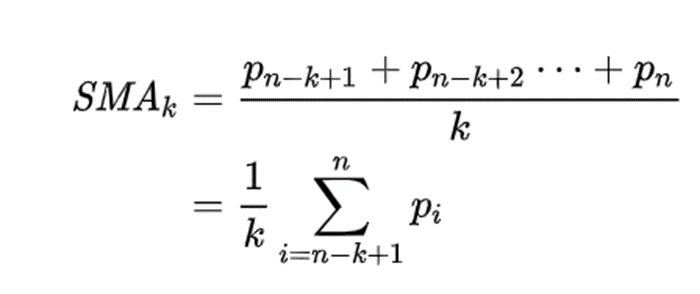

Here the same sampling width of k is the range from (n-k+1) to n. When calculating SMA for the next k data points the width of k will be from range (n-k+2) to (n+1) and a new value p(n+1) comes into the picture and p(n-k+1) drops out. SMA for next k values can be summarized with previous one.

SMA can be implemented by using pandas.DataFrame.rolling() function is used to calculate the moving average over a fixed window.

General Syntax for the rolling function is: DataFrame.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None, method=’single’)

Where the window will be a fixed size and it is the number of observations used for calculating the statistic. Other values if not provided will take the default values.

The rolling average creates a subset from the complete series with the size of the window value, which will be the first moving average. Then the subset is changed by moving forward to the next subset with window size.

## Exponentially Weighted Moving Average

EWMA gives more weight to recent observations, or it gives less and less weight to data as they are further removed in time, thus it can capture recent trends more quickly unlike SMA which will give the generic trend as the window is fixed and for the entire dataset.

EMA is implemented by using the function pandas.DataFrame.ewm().
General syntax is
DataFrame.ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0, times=None)

In EWMA, the weight applied depends on the “adjust parameters” and the number of periods used. The adjust is by default true.

The weight is calculated using the formula, where alpha is smoothing factor which takes value between 0 and 1 including 1.
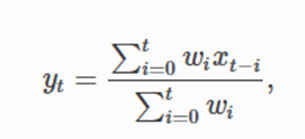

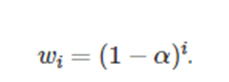

When the adjust parameters is true yt is calculated as

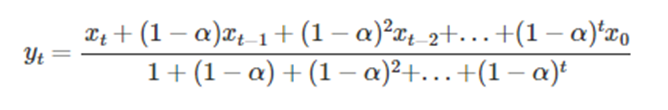

When adjust parameter is false yt is calculated as


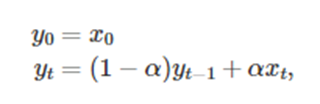

Span corresponds to what is commonly called an “N-day EW moving average” and it is mutually exclusive with alpha. When the span is provided alpha is calculated as 2/(span+1) where span >= 1.

## Plotting time series with .rolling()

[Go to Top](#0.1)

In [ ]:
for i, column in enumerate(df.drop('Date', axis=1).columns):
    df[column].plot(figsize=(20,5))
    df.rolling(5).mean()[column].plot(color = 'red')
    
    My_Title = "Window Size - 5 for " + df.columns[i+1]
    plt.title(My_Title)
    plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
From visualisation we can conclude that except for temperature all have non-constant mean and non-constant variance. 
However, Temperature shows strong seasonality, hot in summer, cold in winter[mentioned in problem statement].
Thus we can go for ADF Test for further analysis.</p> </div>



<a id="11"></a> <br>
# 11. ADF Test

[Go to Top](#0.1)

Augmented Dickey-Fuller (ADF) test is a statistical test that belongs to the unit root test which tests the null hypothesis.

The unit root is a characteristic of a time series which makes it non-stationary. A linear stochastic process has a unit root if 1 is a root of the process’s [characteristic equation](https://en.wikipedia.org/wiki/Characteristic_equation_(calculus)). Such a process is non-stationary but does not always have a trend.

If alpha =1 in the below equation, then unit root exists in time series (that is time series is not stationary)

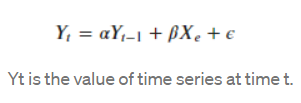

In ACF, the null hypothesis (H0) is considered as test time series is not stationary that is it has a unit root and alternative hypothesis is considered as time series is stationary that is it has no unit root.

Time-series models like ARIMA assume that the data is stationary. Because when the time series is stationary, the mean and variance and covariance are constant and we can accurately do the statistical analysis.

In ACF to conclude that the time series is stationary, the null hypothesis should be rejected.
To reject the null hypothesis either the p-value should be less than the default significance level of 5% or the test statistic is less than the critical value.

adfuller() is used to do ADF test.

General syntax is :

statsmodels.tsa.stattools.adfuller(x, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)

The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root, with the alternative that there is no unit root. If the pvalue is above a critical size, then we cannot reject that there is a unit root.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(col, title):
    result = adfuller(col)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']
    
    
    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'green' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'yellow'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'orange'
    else:
        linecolor = 'red'
    #sns.lineplot(x=df.index.values, y=col, color=linecolor)
    sns.lineplot(x=df['Date'], y=col, color=linecolor)
    plt.title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    plt.ylabel(ylabel=title, fontsize=14)


In [ ]:
for i, column in enumerate(df.drop('Date', axis=1).columns):
    adf_test(df[column].values, df.columns[i+1])
    plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
From ADF Test we can conclude that P value is less than significant value and ADF statistics is less than critical value. So the timeseries is stationary and there is no need for differenciating or transforming the data for ARIMA model.</p> </div>

<a id="12"></a> <br>
# 12. AutoCorrelation 

[Go to Top](#0.1)

When there is no relation between error term the timeseries will have no autocorrelation.

Ideally, 

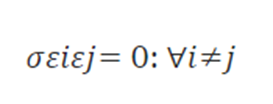

When it fails, and there is an relation between error terms autocorrelation occurs, which is also known as serial correlation. It affects the standard errors without affecting coefficients that will be unbiased. 

The main cause of autocorrelation is due to omitted variables or incorrect functional forms.
The common way to detect autocorrelation is to plot a scatter plot with all residuals and look for patterns. If there are no patterns, then it implies there is no autocorrelation. The Durbin-Watson test method can also be used to find autocorrelation.

Autocorrelation Analysis is essential when doing ARIMA model because it helps to identify AR (Auto Correlation) and MA(Moving Average)  part of ARIMA model.
The AR part of ARIMA indicates that the evolving variable of interest is regressed on its own lagged (i.e., prior) values. 

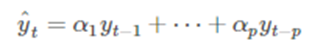

We can build a linear regression model here as the current value  is dependent on previous values.

The MA part indicates that the regression error is a linear combination of error terms whose values occurred contemporaneously and at various times in the past.

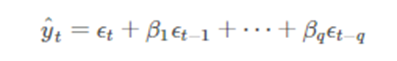

The MA model assumes that the current value is dependent on the error terms including the current error, because error terms are random, there is no linear relationship between the current value and the error terms.

We can use autocorrelation_plot() from pandas.plotting library to check autocorrelation.



Autocorrelation function (ACF) and partial autocorrelation (PACF) plots can used to check Autocorrelation. These two plots, graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps.


<a id="12.1"></a> <br>
# 12.1 Autocorrelation Function (ACF)

[Go to Top](#0.1)

Here we check correlation between time series with a lagged version of itself. That is correlation between the observation at the current time spot and the observations at previous time spots.
The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

For this we can use the **plot_acf()** function from the **statsmodels.graphics.tsaplots** library.

By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed.


<a id="12.2"></a> <br>
# 12.2 Partial Autocorrelation Function (PACF)

[Go to Top](#0.1)

Additional correlation explained by each successive lagged term. 

We can use function, **plot_pacf()** function from the **statsmodels.graphics.tsaplots** library with the parameter method = "ols“.

PACF start with a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.


<a id="12.3"></a> <br>
# 12.3.  Autocorrelation, ACF and PACF plots

## Lake_Level

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Lake_Level)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df.Lake_Level,lags=100, ax=ax[0])
plot_pacf(df.Lake_Level,lags=100, ax=ax[1])
plt.show()

## Flow_Rate

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df.Flow_Rate)
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(df.Flow_Rate,lags=100, ax=ax[0])
plot_pacf(df.Flow_Rate,lags=100, ax=ax[1])
plt.show()

## Plot Analysis

ACF plot is merely a bar chart of the coefficients of correlation between a time series and lags of itself. 

The PACF plot is a plot of the partial correlation coefficients between the series and lags of itself.
From the plot the autocorrelations are significant for many lags(In Starting), but perhaps the autocorrelations at lags 2 and above are merely due to the propagation of the autocorrelation at lag 1. 
This is confirmed by the PACF plot.

In PACF plot has a significant spike only at lag 1, which means that all the higher-order autocorrelations are effectively explained by the lag-1 autocorrelation.

The sinusoidal shape is 95% confidence interval.

If the PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), then autocorrelation pattern can be explained more easily by adding AR terms than by adding MA terms.  


If the ACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative--i.e., if the series appears slightly "over differenced"--then consider adding an MA term to the model. The lag at which the ACF cuts off is the indicated number of MA terms.


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
    Plot Analysis:
    <li> Lake_Level ACF is having significantly high correlation in starting lags and for PACF is having a negative high correlation at 3 lag and then it is significanlty less. Here we can use ARIMA(1,1,0) </li>
    <li> Flow_Rate ACF and PACF is only high for initial 2 lags.ARIMA(1,1,1)</li>
         So here both AR and MA components is to be added for ARIMA model  </p> </div> 
   


<a id="13"></a> <br>
# 13. Training and Test Data Creation 

[Go to Top](#0.1)

For timeseries, test data will be lastest data available and training will be rest.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.model_selection import cross_val_score

In [ ]:
def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
   
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    
    tscv = TimeSeriesSplit(n_splits=3) 
    
    
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [ ]:
def timeseries_train_test_split(X, y, test_size):
   
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_ar = df[['Date']]
X = df.drop(['Lake_Level', 'Flow_Rate'],axis = 1)
y = df[['Lake_Level', 'Flow_Rate']]

### Split for ARIMA Model

In [ ]:
X_train_ar, X_test_ar, y_train_ar, y_test_ar = timeseries_train_test_split(X_ar, y, test_size=0.2)

In [ ]:
y_train_ll = y_train_ar[['Lake_Level']]
y_train_fr = y_train_ar[['Flow_Rate']]
y_test_ll = y_test_ar[['Lake_Level']]
y_test_fr = y_test_ar[['Flow_Rate']]

### Split for XGBRegressor Model

In [ ]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.2)

In [ ]:
y_train_Lake_Level = y_train[['Lake_Level']]
y_train_Flow_Rate = y_train[['Flow_Rate']]
y_test_Lake_Level = y_test[['Lake_Level']]
y_test_Flow_Rate = y_test[['Flow_Rate']]

<a id="14"></a> <br>
# 14. Model Creation

Here ARIMA model and XGBRegressor model are build

<a id="15"></a> <br>
# 15. ARIMA

[Go to Top](#0.1)

ARIMA is one example of a traditional method of forecasting time series. ARIMA stands for Auto-Regressive Integrated Moving Average and is divided into 3 parts :

AR (p) — The auto-regressive part represents the number of time periods to apply lag our data for. A p term of 2 means we consider two time-steps before each observation as the explanatory variables for that observation for the autoregressive portion of the calculation. The observation itself becomes the target variable.

I (d) — For the Integrated portion, d represents the number of differencing transformations applied to the series to transform a non-stationary time series to a stationary one. Differencing is explained in more detail further down.

MA (q)— A time series is thought to be a combination of 3 components: Trend refers to the gradual increase or decrease of the time series over time, Seasonality is a repeating short-term cycle in the series, and Error refers to noise not explained by seasonality or trend. Moving average therefore refers to the number of lags of the error component to consider. 

**𝐴𝑅𝐼𝑀𝐴=𝐴𝑅+constant+𝑀𝐴 [ARIMA( p, d, q)]**

were,
AR = a linear combination of p consecutive values in the past time points (i.e., lags)

MA = a linear combination of q consecutive forecast errors in the past time points (i.e., lagged forecast errors)

Both AR and MA can only be applied to a stationary time series, which is achieved by differencing in ARIMA.


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

<a id="15.1"></a> <br>
# 15.1 Lake_Level - ARIMA(1,1,0)

In [ ]:
l = y_test_ll.shape[0]

In [ ]:
model = ARIMA(y_train_ll, order=(0,1,1))
model_fit = model.fit(disp=0)

y_pred_Lake_Level, se, conf = model_fit.forecast(l)

# Calcuate metrics
score_mae = mean_absolute_error(y_test_ll, y_pred_Lake_Level)
score_rmse = math.sqrt(mean_squared_error(y_test_ll, y_pred_Lake_Level))

print('MAE  for Lake_Level using ARIMA(0,1,1) is : {}'.format(score_mae))
print('RMSE for Lake_Level using ARIMA(0,1,1) is : {}'.format(score_rmse))

<a id="15.2"></a> <br>
# 15.2 Flow_Rate - ARIMA(1,1,1)

In [ ]:
model = ARIMA(y_train_fr, order=(1,1,1))
model_fit = model.fit(disp=0)

y_pred_Flow_Rate, se, conf = model_fit.forecast(l)

# Calcuate metrics
score_mae = mean_absolute_error(y_test_fr, y_pred_Flow_Rate)
score_rmse = math.sqrt(mean_squared_error(y_test_fr, y_pred_Flow_Rate))

print('MAE  for Flow_Rate using ARIMA(1,1,1) is : {}'.format(score_mae))
print('RMSE for Flow_Rate using ARIMA(1,1,1) is : {}'.format(score_rmse))

<a id="16"></a> <br>
# 16. XGBRegressor 

[Go to Top](#0.1)

XGBoost is an open-source software library which provides a regularizing gradient boosting framework.It uses a parallel tree boosting algorithm to create forecasts and it requires time series dataset be transformed into a supervised learning problem to do forecasting.

<a id="16.1"></a> <br>
# 16.1 Lake_Level 

In [ ]:
from xgboost import XGBRegressor , plot_importance, plot_tree

In [ ]:
X_train.set_index("Date", inplace = True)
X_test.set_index("Date", inplace = True)

In [ ]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):

    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_error(y_test,prediction)
    roor_squared_error = np.sqrt(mean_squared_error(y_test,prediction))
    plt.title("Mean absolute error {}% \nRoot Mean Squared error {}%".format(error,roor_squared_error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

In [ ]:
params = {'n_estimators': 100,
          'max_depth': 4,
          'subsample': 0.7,
          'learning_rate': 0.5,
          'random_state': 0}

In [ ]:
model_ll = XGBRegressor(**params)

In [ ]:
model_ll.fit(X_train, y_train_Lake_Level)

In [ ]:
y_pred_ll = model_ll.predict(X_test)

score_mae = mean_absolute_error(y_test_Lake_Level, y_pred_ll)
score_rmse = math.sqrt(mean_squared_error(y_test_Lake_Level, y_pred_ll))


print('MAE  for Lake_Level using XGBRegressor is : {}'.format(score_mae))
print('RMSE for Lake_Level using XGBRegressor is : {}'.format(score_rmse))

In [ ]:
y_train =y_train_Lake_Level
y_test = y_test_Lake_Level
tscv = TimeSeriesSplit(n_splits=3) 
plotModelResults(model_ll, X_train=X_train, X_test=X_test, plot_intervals=True)

In [ ]:
X.columns

Here features are named as f0 to f5

In [ ]:
model_ll.get_booster().get_score()

In [ ]:
plot_importance(model_ll)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
   For Lake_Level prediction Temperature_Le_Croci is most important feature. </p> </div>

<a id="16.2"></a> <br>
# 16.2 Flow_Rate

In [ ]:
model_fr = XGBRegressor(**params)

In [ ]:
model_fr.fit(X_train, y_train_Flow_Rate)

In [ ]:
y_pred_fr = model_fr.predict(X_test)
score_mae = mean_absolute_error(y_test_Flow_Rate, y_pred_fr)
score_rmse = math.sqrt(mean_squared_error(y_test_Flow_Rate, y_pred_fr))


print('MAE  for Lake_Level using XGBRegressor is : {}'.format(score_mae))
print('RMSE for Lake_Level using XGBRegressor is : {}'.format(score_rmse))

In [ ]:
y_train =y_train_Flow_Rate
y_test = y_test_Flow_Rate
tscv = TimeSeriesSplit(n_splits=3) 
plotModelResults(model_fr, X_train=X_train, X_test=X_test, plot_intervals=True)

In [ ]:
model_fr.get_booster().get_score()

In [ ]:
plot_importance(model_fr)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#9041A0;
           font-size:110%;
           font-family:Segoe UI;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
   For Flow_Rate prediction also Temperature_Le_Croci is most important feature. </p> </div>

<a id="17"></a> <br>
# 17. Forecast using XGBRegressor

[Go to Top](#0.1)

<a id="17.1"></a> <br>
# 17.1 Lake_Level

In [ ]:
from numpy import asarray
from pandas import DataFrame, concat

In [ ]:
df1 = df.drop(['Flow_Rate'],axis = 1)
df1.set_index("Date", inplace = True)
X.set_index("Date", inplace = True)

In [ ]:
def series_to_supervised(data,df1, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    
    cols = list()
    
    for i in range(n_in, 0, -1):
        cols.append(df1.shift(i))
    
    for i in range(0, n_out):
        cols.append(df1.shift(-i))
    
    agg = concat(cols, axis=1)
    
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [ ]:
values = df1.values
train = series_to_supervised(values, df1, n_in=6)

In [ ]:
trainX, trainy = train[:, :-43], train[:, -43]
model_ll.fit(trainX, trainy)

## Predicting next 15 days Lake_Level

In [ ]:
row = X[-20:]
yhat = model_ll.predict(row)

In [ ]:
list_yhat = [yhat[i] for i in range(20)]
list_yhat

<a id="17.2"></a> <br>
# 17.2  Flow_Rate

In [ ]:
df1 = df.drop(['Lake_Level'],axis = 1)
df1.set_index("Date", inplace = True)

In [ ]:
values = df1.values
train = series_to_supervised(values, df1, n_in=6)

In [ ]:
trainX, trainy = train[:, :-43], train[:, -43]
model_fr.fit(trainX, trainy)

## Predicting next 15 days Flow_Rate

In [ ]:
row_fr = X[-20:]
yhat = model_fr.predict(row_fr)

In [ ]:
list_yhat = [yhat[i] for i in range(20)]
list_yhat

<a id="18"></a> <br>
# 18. Reference

[Simple Moving Average and Exponentially Weighted Moving Average](https://sandhyakrishnan02.medium.com/?p=57d4a457d363)

[Stationarity in Time Series](https://medium.com/codex/what-is-stationarity-in-time-series-how-it-can-be-detected-7e5dfa7b5f6b)

[Time Series Data Decomposition](https://medium.com/codex/time-series-data-decomposition-b51819f15e23)

https://machinelearningmastery.com/xgboost-for-time-series-forecasting/
